# 프로젝트 개요
- 강의명 : (산대특)_공공데이터 활용 빅데이터 분석 및 시각화 전문가 과정 육성
- 교과목명 : 머신러닝 기초
- 프로젝트 주제 : wine 데이터를 활용한 분류 모형 만들기
- 프로젝트 마감일 : 2022년 10월 21일 금요일
- 수강생명 : 김도위

## 평가 1. 데이터 수집 (10점)
- 와인 데이터셋을 판다스 데이터 프레임으로 불러들인다. 
- Describe 함수를 사용하여 각 변수의 평균과 표준편차를 구한다. 
  + alcohol (평균/표준편차)
  + sugar (평균/표준편차)
  + pH (평균/표준편차)

- 와인 데이터 불러오기

In [272]:
# 코드
# 와인 데이터를 불러오기
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


- 와인 데이터의 각 변수의 평균과 표준편차

In [273]:
# Describe 함수를 통해 alcohol, sugar, pH 변수의 평균과 표준편차 등을 구함
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [274]:
# alcohol 평균
alcohol_mean = np.mean(wine['alcohol'])
print('alcohol의 평균은:' , alcohol_mean)

# alcohol 표준편차
alcohol_std = np.std(wine['alcohol'])
print('alcohol의 표준편차는:' ,alcohol_std)

alcohol의 평균은: 10.491800831152839
alcohol의 표준편차는: 1.1926199559167747


In [275]:
# sugar 평균
sugar_mean = np.mean(wine['sugar'])
print('sugar의 평균은:' ,sugar_mean)

# sugar 표준편차
sugar_std = np.std(wine['sugar'])
print('sugar의 표준편차는:' ,sugar_std)

sugar의 평균은: 5.443235339387409
sugar의 표준편차는: 4.757437575159563


In [276]:
# pH 평균
pH_mean = np.mean(wine['pH'])
print('pH의 평균은:' ,pH_mean)

# pH 표준편차
pH_std = np.std(wine['pH'])
print('pH의 표준편차는:' ,pH_std)

pH의 평균은: 3.2185008465445586
pH의 표준편차는: 0.16077482767043685


## 평가 2. 데이터 시각화 (20점)
- 종속변수를 기준으로 각 변수의 박스플롯을 작성한다. 
- 각 변수별 조합을 통해 산점도를 작성한다. 
- 점수
  + 시각화 5개 20점 
  + 시각화 3개 10점 
  + 시각화 1개 5점

- 각 변수의 박스플롯

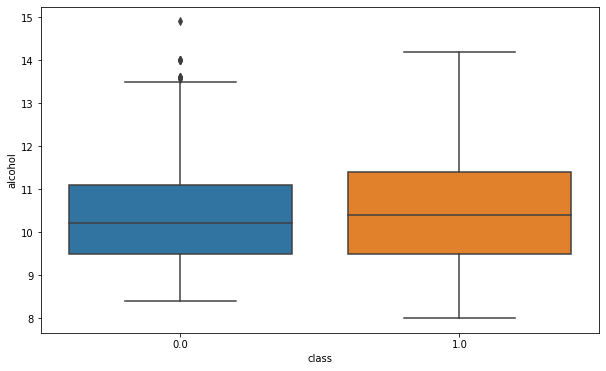

In [277]:
# 코드
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# seaborn 함수를 통해 alcohol의 박스플롯을 구함
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=wine, x='class', y='alcohol')
plt.show()

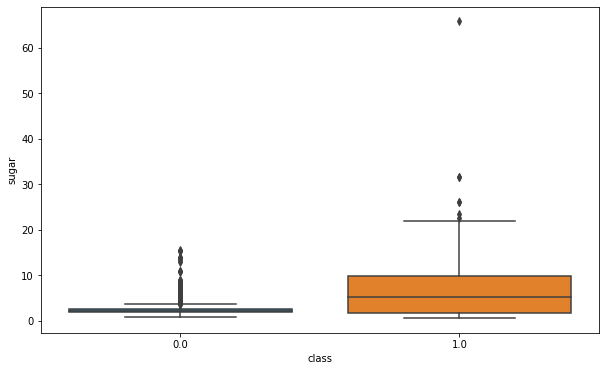

In [278]:
# seaborn 함수를 통해 sugar의 박스플롯을 구함
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=wine, x='class', y='sugar')
plt.show()

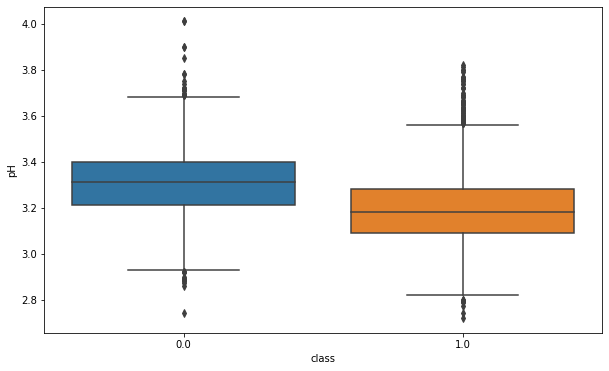

In [279]:
# seaborn 함수를 통해 pH의 박스플롯을 구함
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=wine, x='class', y='pH')
plt.show()

- 각 변수의 산점도와 종합 산점도

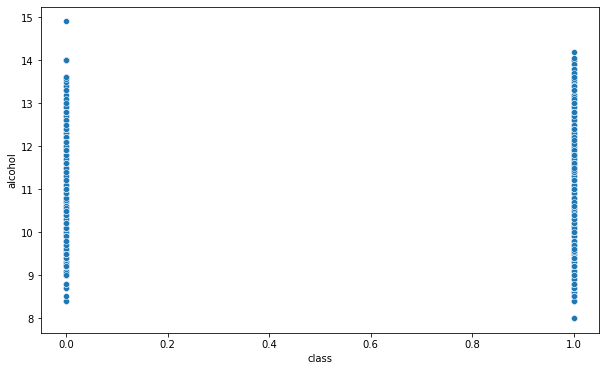

In [280]:
# seaborn 함수를 통해 alcohol의 산점도를 구함
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=wine, x='class',y='alcohol')
plt.show()

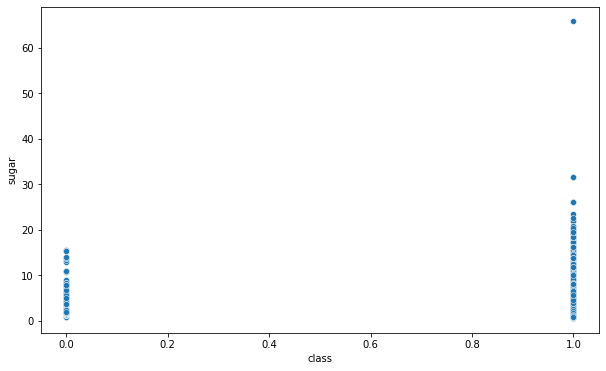

In [281]:
# seaborn 함수를 통해 sugar의 산점도를 구함
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=wine, x='class',y='sugar')
plt.show()

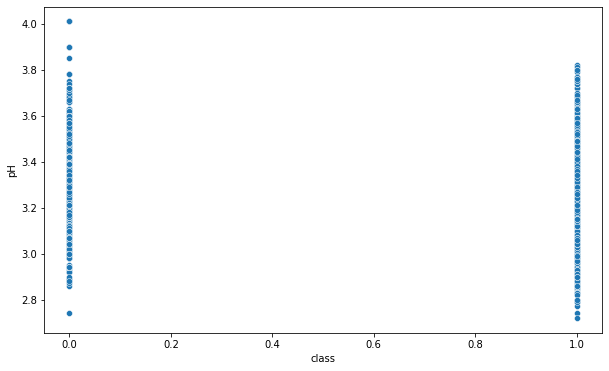

In [282]:
# seaborn 함수를 통해 pH의 산점도를 구함
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=wine, x='class',y='pH')
plt.show()

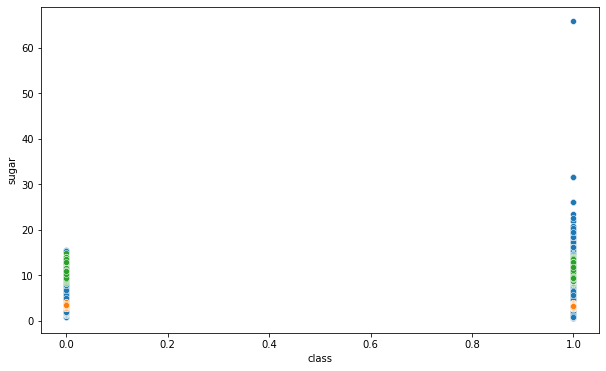

In [283]:
# seaborn 함수를 통해 alcohol, sugar, pH의 종합 산점도를 구함
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=wine, x='class',y='sugar')
sns.scatterplot(data=wine, x='class',y='pH')
sns.scatterplot(data=wine, x='class',y='alcohol')
plt.show()

## 평가 3. 피처 공학 및 데이터 분리 (20점)
- 교차검증을 위한 데이터세트를 준비한다. 
- 데이터 표준화를 진행한다. 

- 데이터 세트 분리

In [284]:
# 코드
# 와인 데이터의 종속변수와 독립변수를 numpy 배열로 변경함
wine_data = wine[['alcohol','sugar','pH']].to_numpy()
wine_target = wine['class'].to_numpy()

# 와인 데이터의 종속변수와 독립변수를 train 세트와 test세트로 분리함
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split (
    wine_data, wine_target, test_size=0.2,random_state=42
)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((5197, 3), (1300, 3), (5197,), (1300,))

- 데이터 표준화

In [285]:
# 와인 데이터의 종속변수의 각 단위를 표준화함
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 평가 4. 머신러닝 모델링 (40점)
- 분류 모형을 만들기 위해 다양한 알고리즘을 적용할 수 있다. 
- 분류 모형을 만들기 위해 하이퍼파라미터를 적용할 수 있다.
- 채점기준
  + 모델 3개 개발 + 각 모델 하이퍼 적용 : 40점
  + 모델 2개 개발 + 각 모델 하이퍼 적용 : 30점
  + 모델 1개 개발 + 각 모델 하이퍼 적용 : 20점
  + 모델 N개 개발 + 하이퍼파라미터 미 적용 시 20점

- K-최근접 이웃 회귀 모델

In [286]:
# 코드
# K-최근접 이웃 회귀 모델로 분류 모형 만듬
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=90) # 하이퍼파라미터를 적용함
knr.fit(train_scaled, train_target)

# 모델 평가를 산출함
print(knr.score(train_scaled, train_target))
print(knr.score(test_scaled, test_target))

0.3757793703335023
0.36798552762762793


In [287]:
# 다른 K-최근접 이웃 회귀 모델로 분류 모형 만듬
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=26) # 하이퍼파라미터를 적용함
kn.fit(train_scaled, train_target)

# 모델 평가를 산출함
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8620357898787763
0.8461538461538461


- 로지스틱회귀

In [288]:
# 로지스틱회귀 모델을 적용함
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.5) # 하이퍼파라미터를 적용함
lr.fit(train_scaled, train_target)

# 모델 평가를 산출함
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7802578410621512
0.7769230769230769


- 결정트리

In [289]:
# 결정트리 모델을 통해 분류 모형 만듬
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate # 교차 검증
from sklearn.model_selection import StratifiedKFold # 교차 검증

dt = DecisionTreeClassifier(random_state=42) 

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_validate(dt, train_scaled, train_target, cv=splitter)


print(np.mean(scores['test_score']))

0.8581873425226025


In [290]:
# 결정트리 모델을 통해 분류 모형 만듬
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV # 직접 입력값을 통해 최적의 하이퍼 파라미터 값을 찾음

dt = DecisionTreeClassifier(random_state=42)

params = {'max_depth': [2,3,4,5,6,7],
          'min_impurity_decrease' : np.arange(0.0001,0.001,0.01), # 노드 분할시, 불순도 감소, 최저량 지정
          'min_samples_split' : range(2,100,10)
          }

gs = GridSearchCV(dt, params, n_jobs=-1)
gs.fit(train_scaled, train_target)

print(gs.best_params_) # 최적의 하이퍼 파라미터 값을 산출

best_dt = gs.best_estimator_
print(best_dt.score(train_scaled, train_target)) # 하이퍼 파라미터를 적용한 평가 산출
print(best_dt.score(test_scaled, test_target)) # 하이퍼 파라미터를 적용한 test 평가 산출

{'max_depth': 7, 'min_impurity_decrease': 0.0001, 'min_samples_split': 92}
0.8793534731575909
0.8592307692307692


In [291]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV # 무작위 산출값을 통해 최적의 하이퍼 파라미터 값을 찾음
from scipy.stats import uniform, randint

params = {'max_depth': randint(2,50), # 2 ~ 50 까지의 정수 산출
          'min_impurity_decrease' : uniform(0.0001,0.1), # 노드 분할시, 불순도 감소, 최저량 지정, 0.0001 ~ 0.1 까지의 실수 산출
          'min_samples_split' : randint(2,50) # 2 ~ 50 까지의 정수 산출
          }

# 무작위 산출값을 찾음
rs = RandomizedSearchCV(dt, params, n_iter=100,random_state=42, n_jobs=-1)

rs.fit(train_scaled,train_target)

print(rs.best_params_) # 최적의 하이퍼 파라미터 값을 산출

best_dt = rs.best_estimator_
print(best_dt.score(train_scaled, train_target)) # 하이퍼 파라미터를 적용한 평가 산출
print(best_dt.score(test_scaled, test_target)) # 하이퍼 파라미터를 적용한 test 평가 산출

{'max_depth': 39, 'min_impurity_decrease': 0.00017787658410143285, 'min_samples_split': 22}
0.9053299980758129
0.8576923076923076


## 평가 5. 머신러닝 평가 (10점)
- 훈련데이터 및 테스트 데이터의 정확도를 산출한다. 
- 정확도 산출 10점 / 미 산출 (0점)

- K-최근접 이웃 회귀 모델

In [292]:
# 코드
# KNeighborsRegressor 모델 평가
print(knr.score(train_scaled, train_target))
print(knr.score(test_scaled, test_target))

print('-'*30)

# KNeighborsClassifier 모델 평가
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.3757793703335023
0.36798552762762793
------------------------------
0.8620357898787763
0.8461538461538461


- 로지스틱 회귀

In [293]:
# LogisticRegression 모델 평가
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7802578410621512
0.7769230769230769


- 결정트리

In [294]:
# DecisionTreeClassifier 모델 평가
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692
